Understanding context modifiers: **harmonic_stimulus_CM**
=========================================================

This example shows a way to use the built-in [context modifiers](../../usersguide/optimization.rst#context-modifier)
:`harmonic_stimulus_CM`.

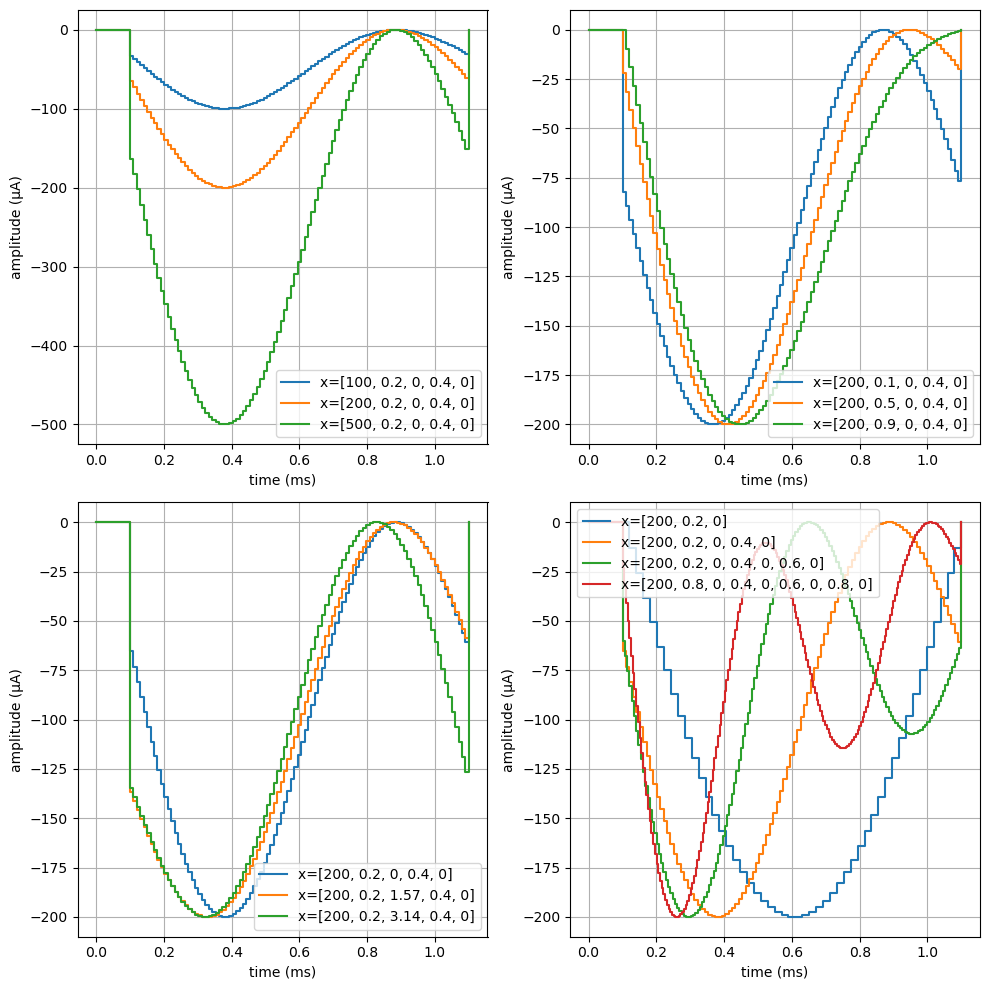

In [13]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import nrv

# Generate a dummy static context
t_sim=10
l_ax = 10000
ax = nrv.myelinated(y=0, z=0, L=l_ax)
E1 = nrv.point_source_electrode(x=l_ax/2,y=0, z=100)
dummy_stim = nrv.stimulus()

extra_stim = nrv.stimulation("epineurium")
extra_stim.add_electrode(E1, dummy_stim)
ax.attach_extracellular_stimulation(extra_stim)
static_context = ax.save(extracel_context=True)


# set the context modifier
start = 0.1
t_pulse = 1
amplitude = 200

test_stim_CM = nrv.harmonic_stimulus_CM(start=start,t_pulse=t_pulse)

# For each of this points we are going to generate the axon
# from static context with the context modifier
# and then plot the stimulus


X = [
    [100,0.2,0, 0.4,0],
    [200,0.2,0, 0.4,0],
    [500,0.2,0, 0.4,0],
]

fig1, axs1 = plt.subplots(2,2, figsize=(10, 10))
for i, x in enumerate(X):
    ax = test_stim_CM(x, static_context)
    stim = ax.extra_stim.stimuli[0]
    del ax
    stim.plot(axs1[0,0], label=f"x={x}")

axs1[0,0].grid()
axs1[0,0].legend()
axs1[0,0].set_xlabel('time (ms)')
axs1[0,0].set_ylabel('amplitude (µA)')


# t_strat

X = [
    [200,0.1,0, 0.4,0],
    [200,0.5,0, 0.4,0],
    [200,0.9,0, 0.4,0],
]


for i, x in enumerate(X):
    ax = test_stim_CM(x, static_context)
    stim = ax.extra_stim.stimuli[0]
    del ax
    plt.figure(1)
    stim.plot(axs1[0, 1], label=f"x={x}")

axs1[0, 1].grid()
axs1[0, 1].legend()
axs1[0, 1].set_xlabel('time (ms)')
axs1[0, 1].set_ylabel('amplitude (µA)')


# s_cathod

X = [
    [200,0.2,0, 0.4, 0],
    [200,0.2,3.14/2, 0.4, 0],
    [200,0.2,3.14, 0.4, 0],
]


for i, x in enumerate(X):
    # we get the stimulus of the axon generated from the context modifier
    ax = test_stim_CM(x, static_context)
    stim = ax.extra_stim.stimuli[0]
    del ax
    stim.plot(axs1[1, 0], label=f"x={x}")

axs1[1, 0].grid()
axs1[1, 0].legend()
axs1[1, 0].set_xlabel('time (ms)')
axs1[1, 0].set_ylabel('amplitude (µA)')

# s_cathod
X = [
    [amplitude,0.2,0],
    [amplitude,0.2,0,0.4,0],
    [amplitude,0.2,0,0.4,0,0.6,0],
    [amplitude,0.8,0,0.4,0,0.6,0,0.8,0]
]



for i, x in enumerate(X):
    # we get the stimulus of the axon generated from the context modifier
    ax = test_stim_CM(x, static_context)
    stim = ax.extra_stim.stimuli[0]
    del ax
    stim.plot(axs1[1, 1], label=f"x={x}")

axs1[1, 1].grid()
axs1[1, 1].legend()
axs1[1, 1].set_xlabel('time (ms)')
axs1[1, 1].set_ylabel('amplitude (µA)')
fig1.tight_layout()